In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
# read CSV (Character/Comma seperated values)

data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# select features to research. (input, output)

data = data[['ENGINESIZE', 'CO2EMISSIONS']]

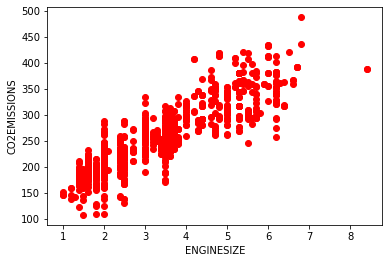

In [18]:
# Visualize ENGINESIZE vs CO2EMISSIONS

#plt.scatterplot(x, y, color)
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color = 'red')

plt.xlabel('ENGINESIZE')      # sets the x axis to a string
plt.ylabel('CO2EMISSIONS')    # sets the y axis to a string

plt.show()   # grabs all the changes in the plt plot and displays them

In [21]:
# We want to divide the data to grab a training and testing set. So we are going to splice the data list and seperate the two values
# into differing data sets. We splice the first one to grab first 80% then splice last one to get last 20% of data


train_data = data[:int(len(data) * 0.8)] # splices the data list and grabs the first 80% of the data to train the model
test_data = data[int(len(data) * 0.8):] # splices the data list and grabs the last 20% (80% -100% of the data) to train the model

print(train_data.head()) # make sure we have initial 80% of data
print(test_data.head()) # make sure we have final 20% of data

   ENGINESIZE  CO2EMISSIONS
0         2.0           196
1         2.4           221
2         1.5           136
3         3.5           255
4         3.5           244
     ENGINESIZE  CO2EMISSIONS
853         2.5           202
854         3.5           255
855         2.5           191
856         2.5           198
857         1.8           161


In [26]:
# Modeling the data

# Using Sklearn to model our data.

regression_line = linear_model.LinearRegression() # sets the model we would like to learn from to a linear regression line model

training_x = np.array(train_data[['ENGINESIZE']]) # sets the training data (x) to be an array of the enginesize
training_y = np.array(train_data[['CO2EMISSIONS']]) # sets the training data (y) to be an array of co2emissions

regression_line.fit(training_x, training_y) # models and calculates the training data of the traiing values we inputted.

print('coef:', regression_line.coef_)
print('Interceot:', regression_line.intercept_)

coef: [[38.79512384]]
Interceot: [127.16989951]


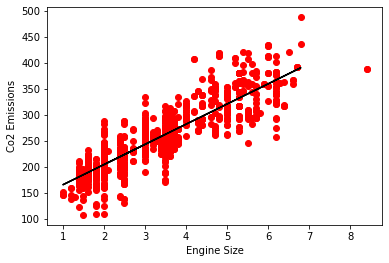

In [30]:


plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color = 'red')
plt.plot(training_x, regression_line.coef_ * training_x + regression_line.intercept_, '-k')

plt.xlabel('Engine Size')
plt.ylabel('Co2 Emissions')
plt.show()